**Material used for this lecture**

* Crawley, M. J. (2012). The R book. John Wiley & Sons.
* Kéry, M., & Schaub, M. (2011). Bayesian population analysis using WinBUGS: a hierarchical perspective. Academic Press.


In [1]:
# option for size of picture output 
set_plot_dimensions <- function(width_choice=9, height_choice=5, res_choice=200) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice, repr.plot.res=res_choice)
        }
set_plot_dimensions()

# Introduction to Statistical Modeling

## From model to statistics

### Model in Sciences

Using mathematics, a model looks something like:

$$
y = f( x, \theta)
$$

* $y$: the response(s) = something that our study system has produced 
* $x$: the explanatory variables = the input of the model (certinaly the responses of a previous model)
* $\theta$: the parameter of the model
* $f$: the function or application linking explanatory variables and parameters to produce the responses

The time $t$ can be a parameter or a variable to account for "seasonalities".

> **QUESTION**
>
> (1) - What are $y$, $\theta$, $x$ and $f$ in a linear model ?
>
> Hint: a linear model is: y = a + b*x

In [2]:
# REPLY (1) HERE


<details>
  <summary>ANSWER</summary>
 
  * $y$: the response
  * $\theta$: the parameters $a$ and $b$
  * $x$: the explanatory variable
  * $f$: the function $f(x) = a + b * x$

</details>

> **QUESTION**
>
> (2) - What is $y$, $f$, $x$ and $\theta$ in the following ODE model ?
>
> ODE model: $\dfrac{dx(t)}{dt} = - a x(t)$

In [3]:
# REPLY (2) HERE


<details>
  <summary>ANSWER</summary>
 
  * $y$: the response is the derivative of the explanatory variable, so $y = \frac{dx(t)}{dt}$
  * $\theta$: the parameters $a$ and eventually $t$
  * $x$: the explanatory variable
  * $f$: the function $f(x) = -a x(t)$

</details>

### Statistical models

Several reason to use statistics:
1. Models are **simplification of reality**, leading to the fact that $f( x, \theta)$ does not produce exaclty $y$,
2. **Observations** that are use as explanatory variables **are not perfect**, so $x_{observed}$ is not the theoretical $x$,
3. **Parameters** (coming from measured, observation, previous experiment) **are not perfect** too, $\theta$ may be wrong.

Mathematically speaking, it results some stochasticity in the model that we can include in the model:

$$
y = f( x, \theta) + \varepsilon
$$

* $\varepsilon$ the part of the response that is not explained by the model $f$, the explanatory variable(s) $x$, and the parameter $\theta$.

In this simplistic view, this vision of modelling is paraphrased as:

| response = systematic + stochastic |
|------------------------------------|
| response = mechanistic + stochastic |
| response = signal + noise |
| response = deterministic + random |


> **QUESTION**
>
> (3) - Using R, write a linear model with white noise (normal distributed noise centered at 0)
>
> (4) - Plot the model
>
> (5) - Add a white noise
>
> (6) - Plot the model with the white noise

In [4]:
# REPLY (3) HERE
#
# y = ...

<details>
  <summary>ANSWER</summary>

```R
# init values
f = function(x,a,b) {return(a+ b*x)}
# Linear model y = a + b*x
x = seq(0,10,by=0.1)
y = f(x,a=1,b=2) 
```

</details>

In [5]:
# REPLY (4) HERE

## HELP: Plot linear model
# plot( ... , ... , type = "l", col = "red")


<details>
  <summary>ANSWER</summary>

```R
plot(x, y, type = "l", col = "red") 
```

</details>

In [6]:
# REPLY (5) HERE

## Add noise
# normal_noise = ...
# y_noise = y + normal_noise

In [7]:
# REPLY (6) HERE



<details>
  <summary>ANSWER</summary>

```R
# Plot linear model with noise
plot(x, y, type = "l", col = "red")
points(x, y_noise) 
```

</details>

## Brief overview of LM, GLM, Mixed and Hierarchical

### LM - A linear model with Normal error

**Linear model in the `R` language**

A typical model has the form `y ~ X` where response is the (numeric) response vector, $y$ and terms $X$ is a series of terms which specifies a linear predictor for response. 
A terms specification of the form `x1 + x2` indicates all the terms in first, `x1`, together with all the terms in second, `x2`, with duplicates removed.
In our formalism, with equation $y = a + b \times x_1 + c \times x_2$ we get `y ~ x1 + x2`.

A specification of the form `x1:x2` indicates the set of terms obtained by taking the interactions of all terms in `x1` with all terms in `x2`. The specification `x1*x2` indicates the cross of `x1` and `x2`. This is the same as `x1 + x2 + x1:x2`.

#### LM on binary data

Let say we have a population of individuals `Living` or not (`Dead=0` or `Alive=1`) and their `Age`:.

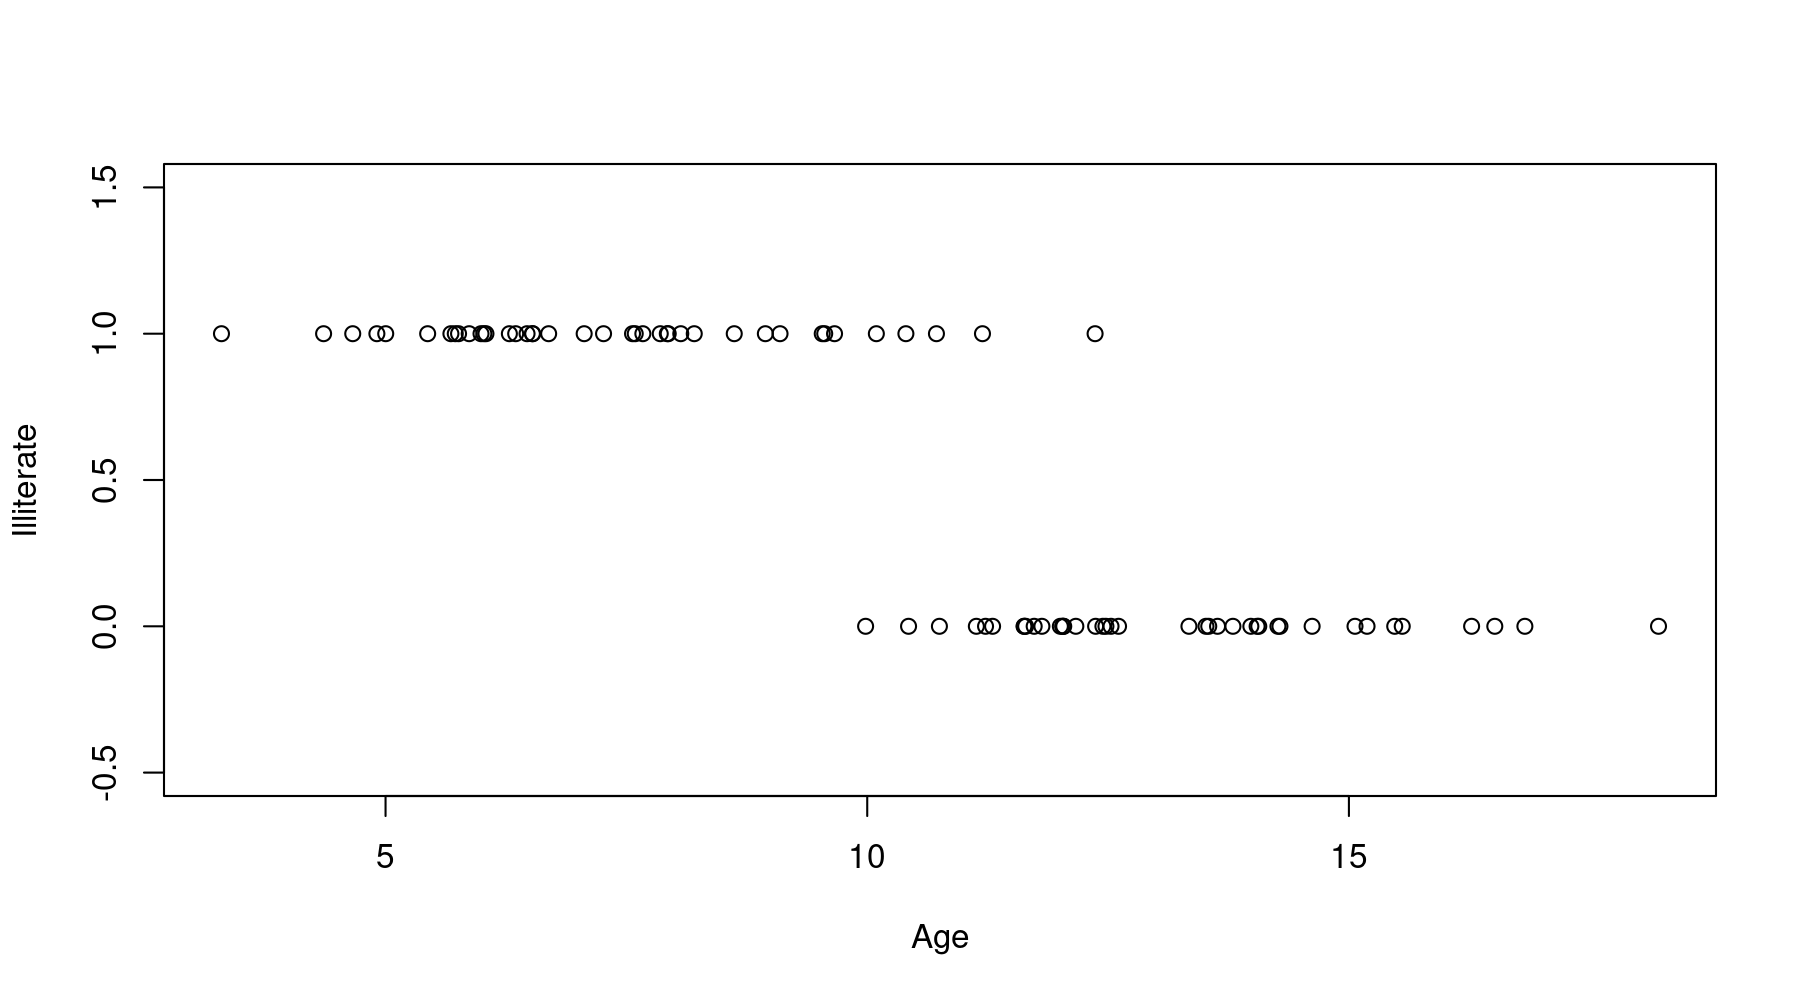

In [8]:
# 1. DATA
age_reader = rnorm(40, 12.5, 2)
age_notreader = rnorm(40,  7.5, 2)
Age = c(age_reader, age_notreader)
Illiterate = c(rep(0,40), rep(1,40))
# 1b PLOT
plot(Age, Illiterate, ylim=c(-0.5,1.5))

In [9]:
# 2. LM MODEL
lm_bin <- lm(Illiterate ~ Age)

> **QUESTION**
>
> (7) - Test the function `summary`and `plot`on the `lm` object

In [10]:
# REPLY (7) HERE

<details>
  <summary>ANSWER</summary>

**copy/paste**

```R
summary(lm_bin)
```

```R
summary(plot) 
```

</details>

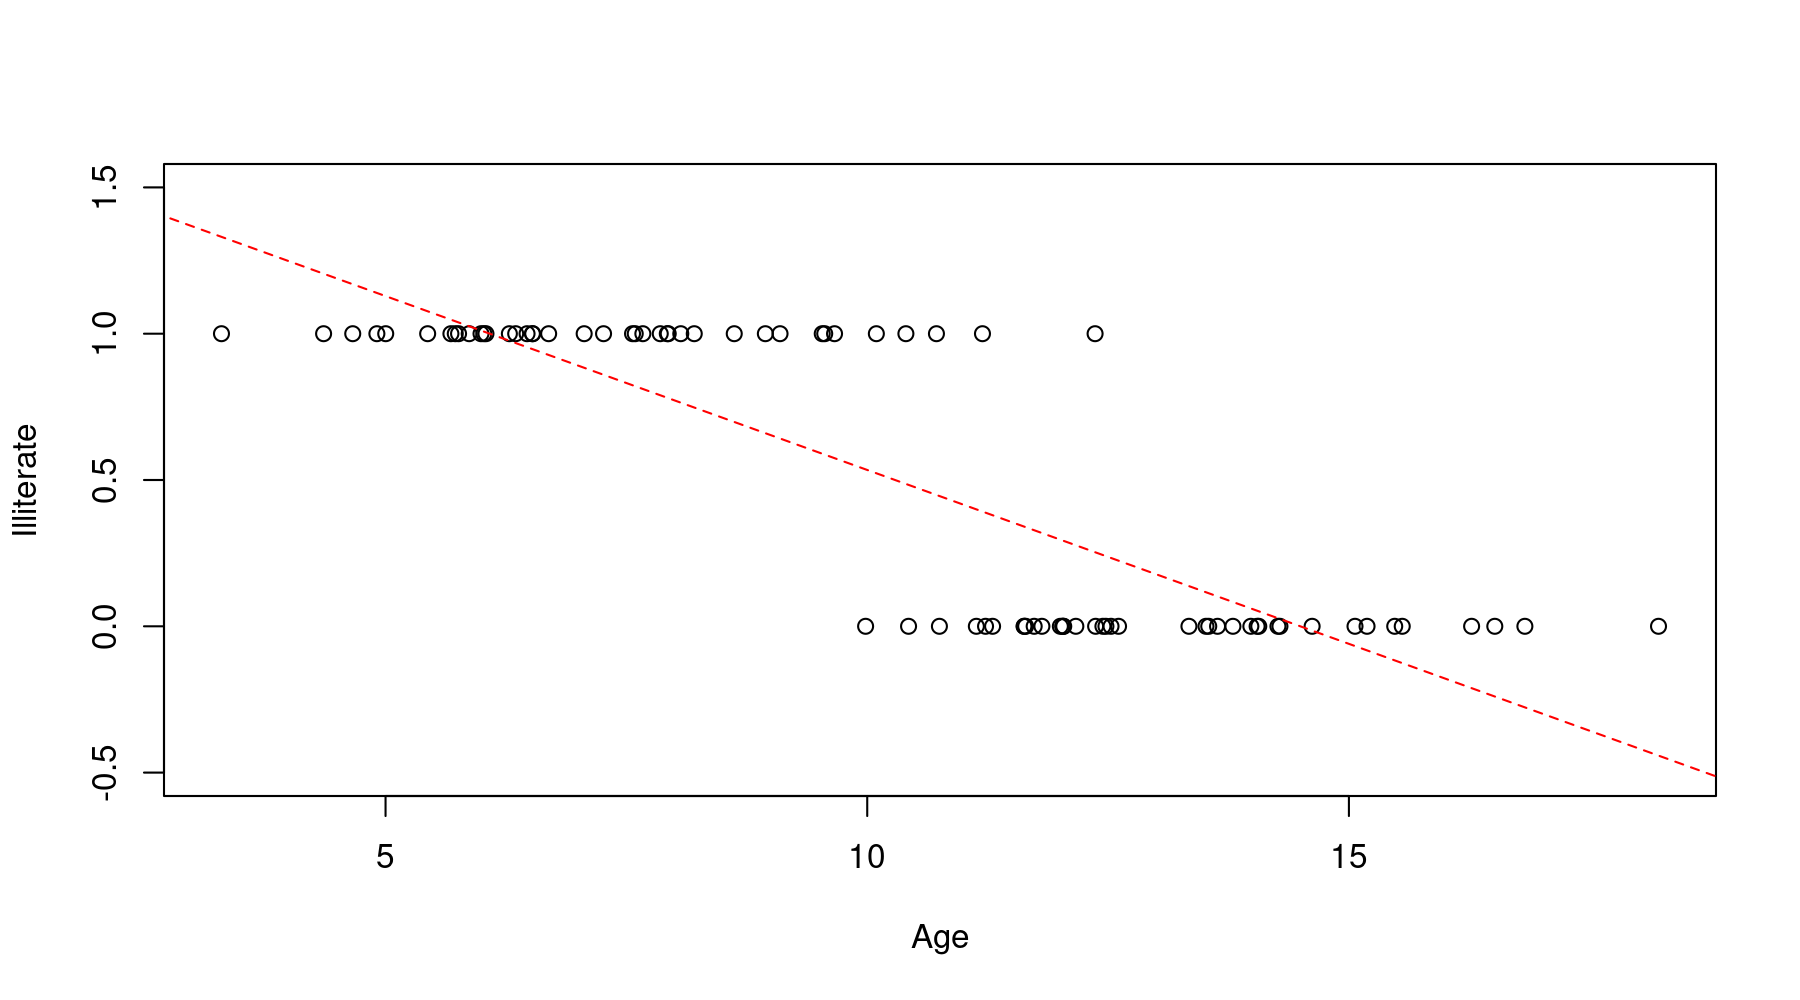

In [11]:
# 3. PLOT
# prediction
a = lm_bin$coefficients[1]
b = lm_bin$coefficients[2]
Age_predict = seq(0,20,0.1)
y_predict = a + b * Age_predict
# plot
plot(Age, Illiterate, ylim=c(-0.5,1.5))
lines(Age_predict, y_predict, col = "red", lty = 2)

### LMEM - A linear mixed-effects models

A very good illustraiton is given in the book of Steve Midway (2022) "Data Analysis in R".

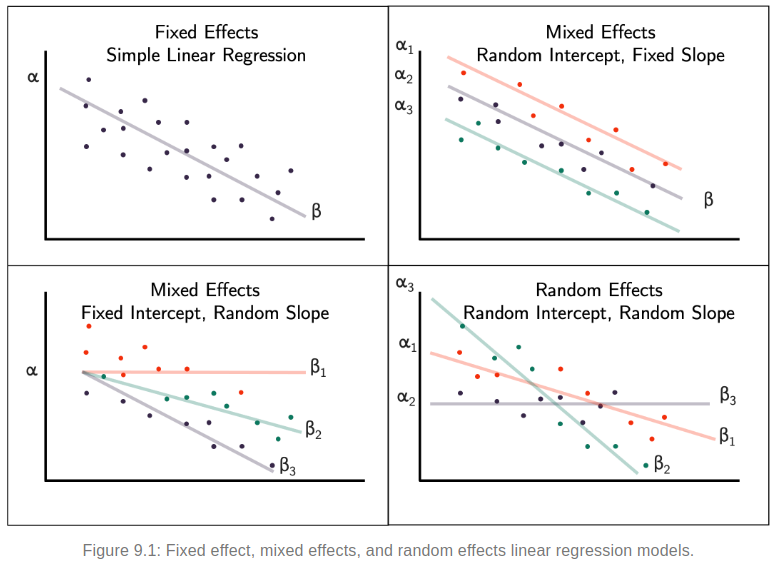

> **QUESTION**
>
> (7) - Recreate the figure of Simple Linear Regression.
>
> (a) - Generate a Simple Linear Regression model: $y = a + b \times x$
> (b) - Add random variable $y = a + b \times x + \varepsilon$ where $\varepsilon \sim \text{Normal}(0,\sigma_ 2)$
> (c) - Run the LM model
> (d) - Plot the figure

In [12]:
# REPLY (7) HERE


<details>
  <summary>ANSWER</summary>

**copy/paste**

```R
x = 1:10
a = 5
b = -2
epsilon = rnorm(length(x), 2)
y = a + b*x + epsilon
lm = lm(y ~ x)
plot(x,y)
abline(a = coef(lm)[1], b = coef(lm)[1])
```
</details>

> **QUESTION**
>
> (8) - Recreate the other models of the LMEM figure.
>
> Hint: here is how to generate the data for the second figure (random intercept, fixed slope
>
> ```R
> x_ = 1:10
> a1 = 4; a2 = 4.5; a3 = 5
> b = -2
> y1 = a1 + b* x_ + rnorm(10,0,0.2)
> y2 = a2 + b* x_ + rnorm(10,0,0.2)
> y3 = a3 + b* x_ + rnorm(10,0,0.2)
> x = rep(x, 3)
> y = c(y1,y2,y3)
> ```

In [13]:
# REPLY (8) HERE


### GLM -  A linear model without Normal error (e.g. Poisson error)

GLM is a generalisation of LM usefull for the following reason:
* It allows the response variable $y$ to have an error distribution other than a normal distribution, 
* The relationship between $x$ and $y$ is not linear,
* Variance of errors in $y$ (commonly called as Homoscedasticity in Linear Regression), is not constant, and varies with $x$,
* Response variable is not continuous, but discrete/categorical. Linear Regression assumes normal distribution of the response variable, which can only be applied on a continuous data.

The previous binary example is typical of the categorical data. A Binomial model with `logit` link  function would have been more appropriate.

But let first start with the `fishing`data from the `COUNT`package.

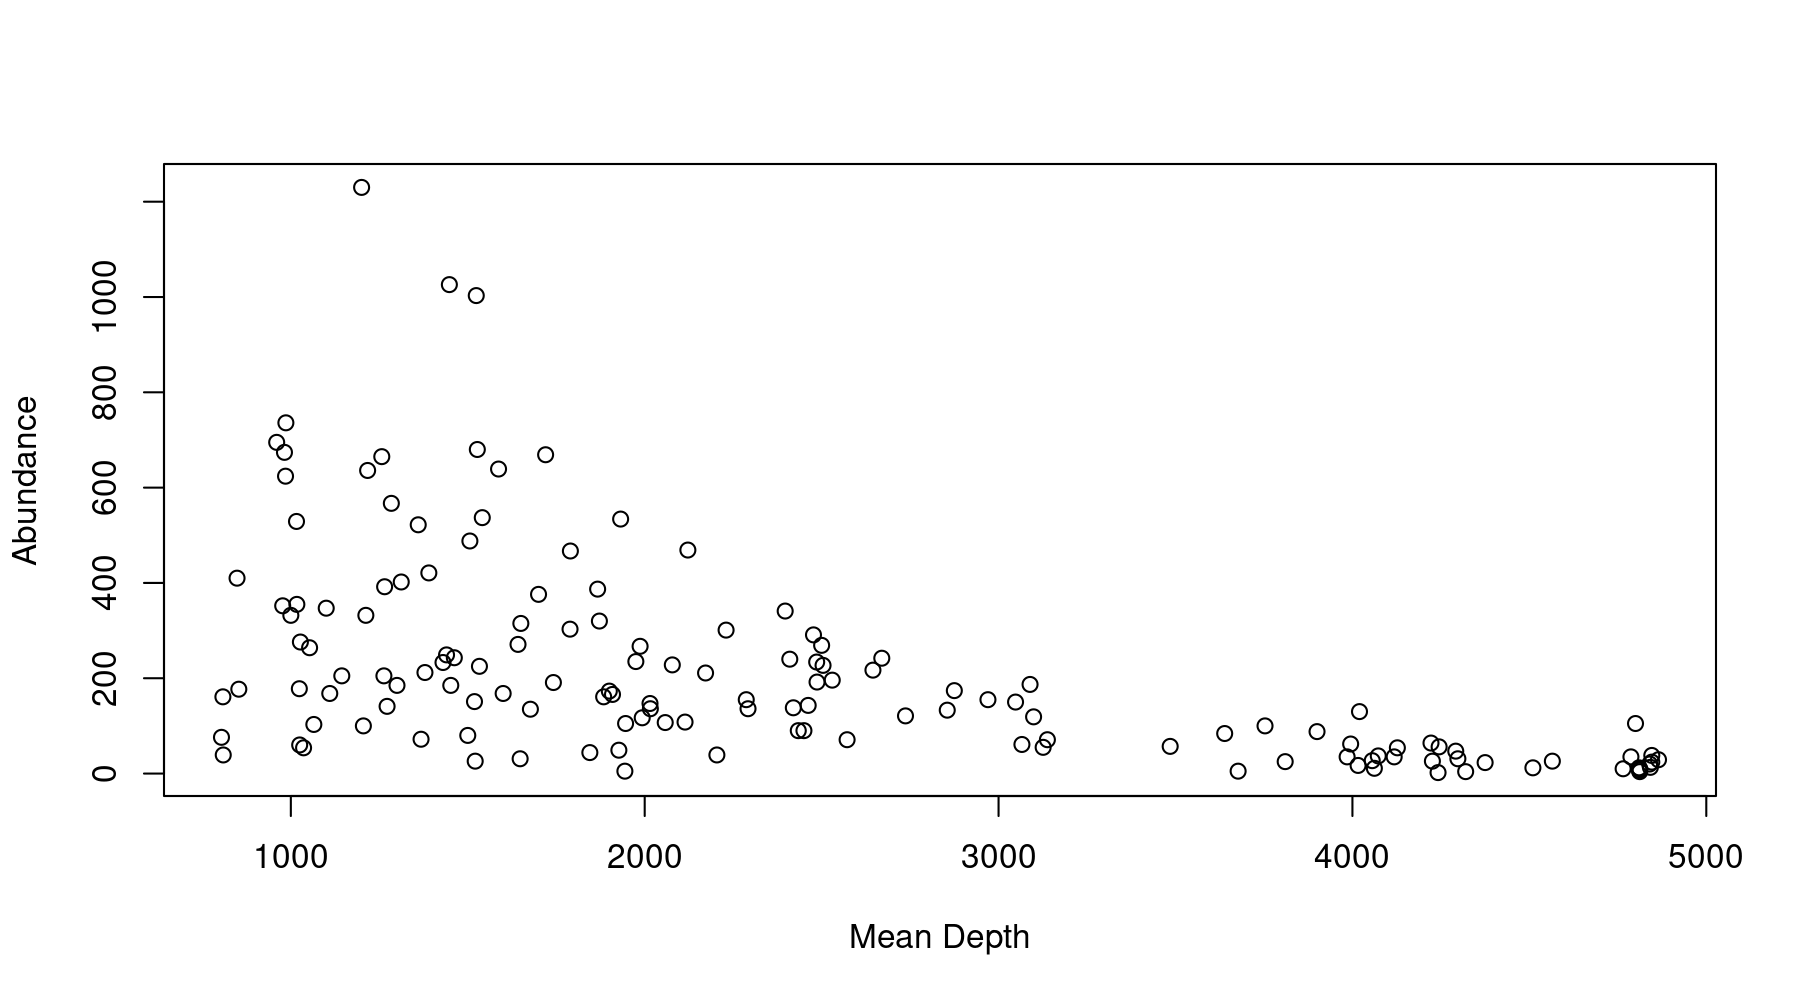

In [14]:
# 1. READ DATA
fishing <- read.table("data/COUNT_fishing.csv", sep = ",", header = TRUE)
# 2. PLOT DATA
plot(fishing$meandepth, fishing$totabund, xlab = "Mean Depth", ylab = "Abundance")

#### Mathematical writting of GLM

For comparison, we are going to use a linear model and a glm with Poisson familly (suited for count data).

For the **linear model** the equation is given by:
$$
\text{totabund} = a + b* \text{meandepth}
$$

To write the error/variability, we can either write:

$$
\text{totabund} = a + b* \text{meandepth} + \varepsilon_{totabund} \quad \text{with: } \quad \varepsilon_{totabund} \sim \text{Normal}(0, \sigma^2_{\text{totabund}})
$$

Or, in the same way:

$$
\text{totabund} \sim  \text{Normal}\left( a + b* \text{meandepth}, \, \sigma^2_{\text{totabund}} \right)
$$

Or again, by a distinction of the stochastic part with the link function:

1. The stochastic part:
$$
\text{totabund} \sim  \text{Normal}\left( \mu_{\text{totabund}}, \, \sigma^2_{\text{totabund}} \right)
$$

2. The link function:
$$
\mu_{\text{totabund}} = a + b* \text{meandepth}
$$

For the **generalized linear model using Poisson family**, the equation is given by 2 steps:

1. The stochastic process
$$
\text{totabund} \sim Poisson(\lambda_{\text{totabund}})
$$

2. The link function
$$
\log(\lambda_{\text{totabund}}) = a + b* \text{meandepth} 
$$

We can write everything in a single equation:
$$
\text{totabund} \sim \text{Poisson}\left(\exp(a + b* \text{meandepth})\right)
$$

In [15]:
# 3. MODEL
fishing_lm = lm(totabund ~ meandepth, data = fishing) 
fishing_poisson = glm(totabund ~ meandepth, data = fishing, family = poisson) 

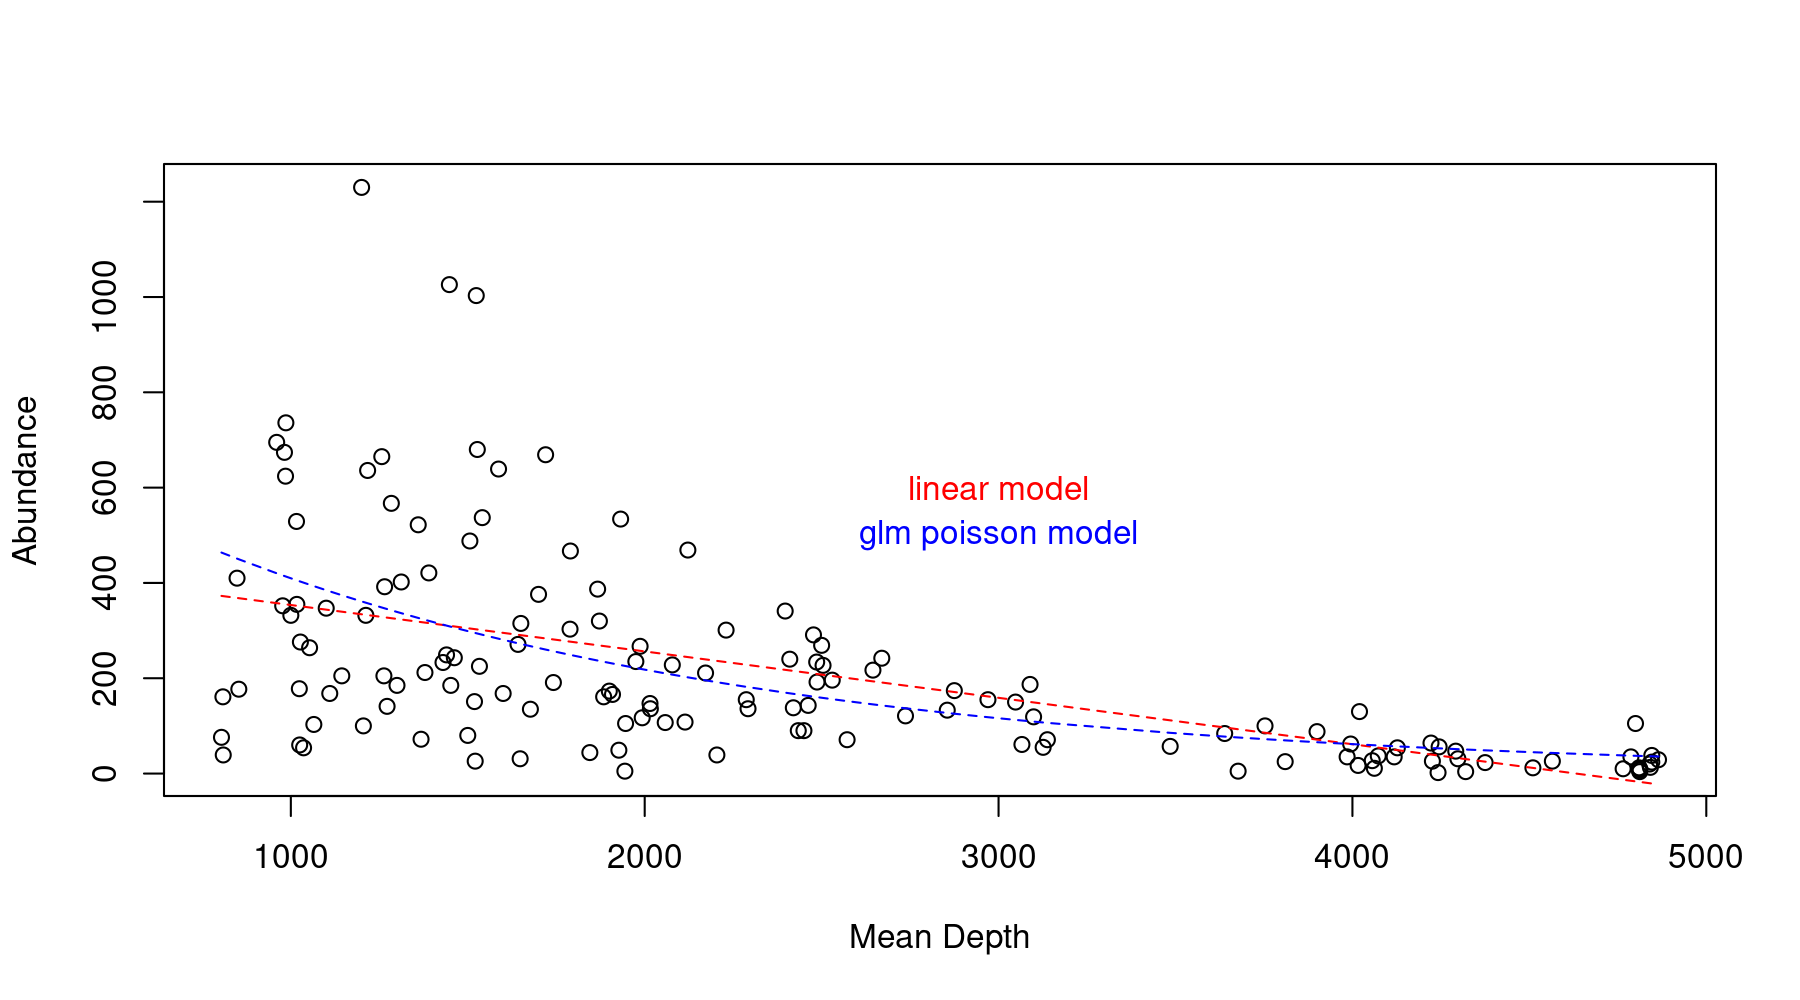

In [16]:
plot(fishing$meandepth, fishing$totabund, xlab = "Mean Depth", ylab = "Abundance")
# LM PLOT
totabund_lm =  coef(fishing_lm)[1]+coef(fishing_lm)[2]*fishing$meandepth
lines(fishing$meandepth, totabund_lm, col = "red", lty=2)
text(x=3000,y=600,labels="linear model", col = "red")
# GLM PLOT
totabund_glm =  exp(coef(fishing_poisson)[1]+coef(fishing_poisson)[2]*fishing$meandepth)
lines(fishing$meandepth, totabund_glm, col = "blue", lty=2)
text(x=3000,y=500,labels="glm poisson model", col = "blue")

> **QUESTION**
>
> (9) - Using the previous model on binary function, implement a better glm model using binomial family with link function "logit"
>
> Hint: This specific familly is given by:
> ```R
> family = binomial(link = "logit") 
> ```

In [17]:
# REPLY (9) HERE


<details>
  <summary>ANSWER</summary>

**copy/paste**

```R
glm_bin = glm(Illiterate ~ Age, family = binomial(link = "logit"))
prediction = data.frame(Age=seq(1,20, 0.1))
prediction$Illiterate <- predict(glm_bin, newdata = prediction, type = "response")
plot(Age, Illiterate, ylim=c(-0.5,1.5))
lines(Age_predict, y_predict, col = "red", lty = 2)
lines(prediction$Age, prediction$Illiterate, col = "orange", lty = 2) 
```
</details>

# Introduction to Bayesian Statistical Models

## Bayesian vs Frequentist models

Conceptually, "data analysis" is based on two steps:
1. **build the model**: in its largest sense: corrélation, mean or variance comparison, differential equation, hierarchical, neural network, ...
2. **use the data**: to find values of parameters of the model, and then validate the model on other data sets

The difference between Frequentist and Bayesian is in the way they treat the uncertinaty about what is unknown in a model, especially around the parameter $\theta$

* **Frequentist**: parameters are fixed and unknown quantities and uncertainty about them is expressed in terms of the variability of hypothetical replicate data sets produced by them. Probability statement are on the data, given fixed parameter values, but never about the parameters themselves.
* **Bayesian**: probability is the sole measure of uncertainty about all unknown quantities: parameters, unobservables, missing or mismeasured values, or future or unobserved response (predictions). The probability is the unified measure of uncertainty. 

## Example of frequentist approach: the tadpole

*Adapted from: Kéry, M., & Schaub, M. (2011). Bayesian population analysis using WinBUGS: a hierarchical perspective. Academic Press.*

1. In $n=50$ artificial ponds, we release a single tadpole.
2. Then, later in the day, we try to see the tadpole in each pond. We find a tadpole in $y=20$ ponds.
3. We want to know: "what is the probability to detect/see a tadpole in a pond?". We call this probability $\theta$.

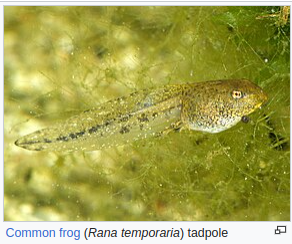


**Following the intuition**:

> **QUESTION**
>
> (12) - What do you expect for $\theta=$?
>
> Hint: The probability to detect a tadpole in a pond, denoted $\theta$, is the amount of tadpole seen of the total amount of ponds... 

In [27]:
# REPLY (12) HERE


<details>
  <summary>ANSWER</summary>

We expect $\theta=20/50$.

</details>

**Following a modelling approach**:

The typical distribution is binomial (see [Binomial on wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)) with:
A binomial distribution helps you answer questions like, "What's the chance of making a certain number of successes when you know the probability of success (e.g., seing a certain number $y$ of tadpoles) for each individual trial (e.g. looking in a pond) and the number of trials you're doing (e.g., 50 ponds)?"

Note: in the original example, it's a single artificial pond, with 50 tadpoles. But the use of Binomial distribution is therefore less straightfoward.

1. The Data part of the model is given by:

$$
y \sim Binomial(n, \theta)
$$

where:
* $y$: number of tadpoles observed
* $n$: number of ponds
* $\theta$: probability to detect a tadpole in a pond

2. The Link function. Without explanatory variable, a linear model with binary data and without explanatory variable (so only parameter) can be express like this:

$$
\theta = a + \varepsilon \quad \text{with:} \quad \varepsilon \sim \text{Normal}(0, \sigma_{\theta})
$$

Hint: the use of Normal distribution is a wrong way to go since $\theta \in (0,1)$, we should rather use a continuous distribution in $(0,1)$, like a Beta distribution for instance, or using a logit transformation as we do in the GLM approach.

### Using LM and GLM

Let imagine a table where we record the experiments:

| Pond Number | Detected |
|-------------|----------|
| 1   | 0   |
| 2   | 1   |
| 3   | 1   |
| ... | ... |
| n   | 1   |


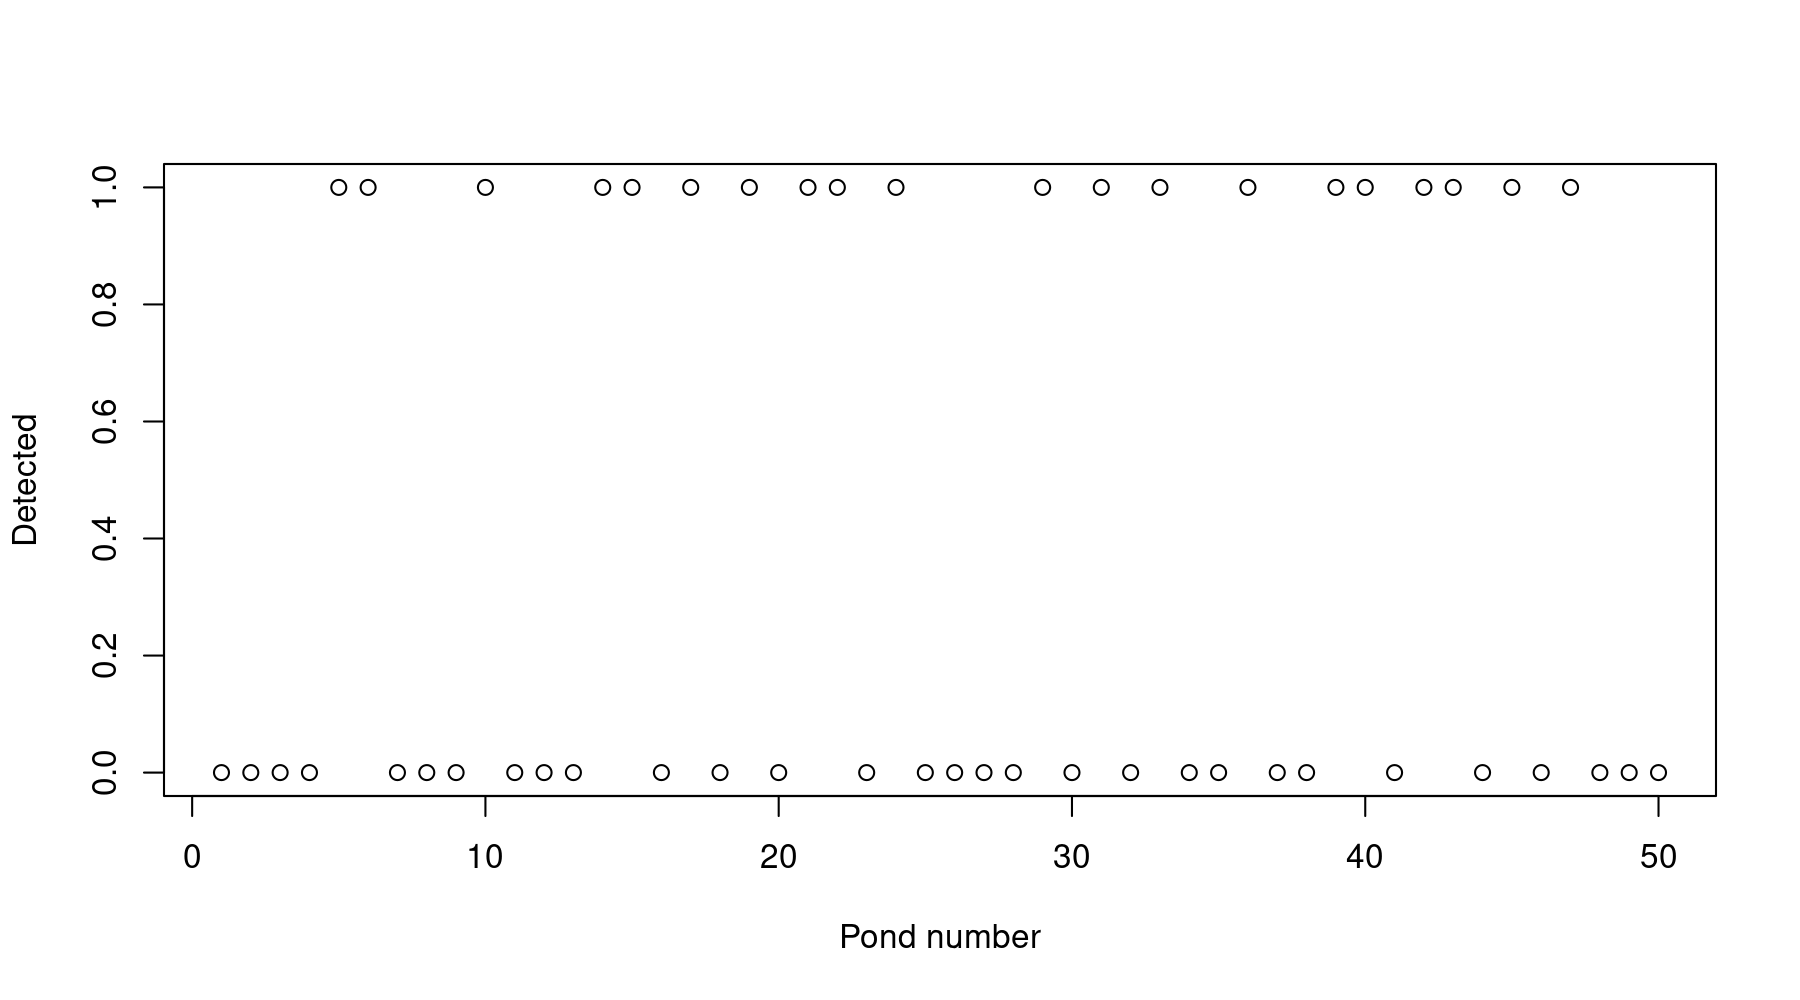

In [28]:
n = 50
y = rbinom(n,1,20/50)
plot(y, xlab = "Pond number", ylab = "Detected")

#### The Linear Model (LM)

In R, the model previously written,

$$
\theta = a + \varepsilon \quad \text{with:} \quad \varepsilon \sim \text{Normal}(0, \sigma_{\theta}),
$$

is given by:

In [29]:
# linear model with binary data and without explanatory variable
tadpole_lm <- lm(y ~ 1)
tadpole_lm


Call:
lm(formula = y ~ 1)

Coefficients:
(Intercept)  
        0.4  


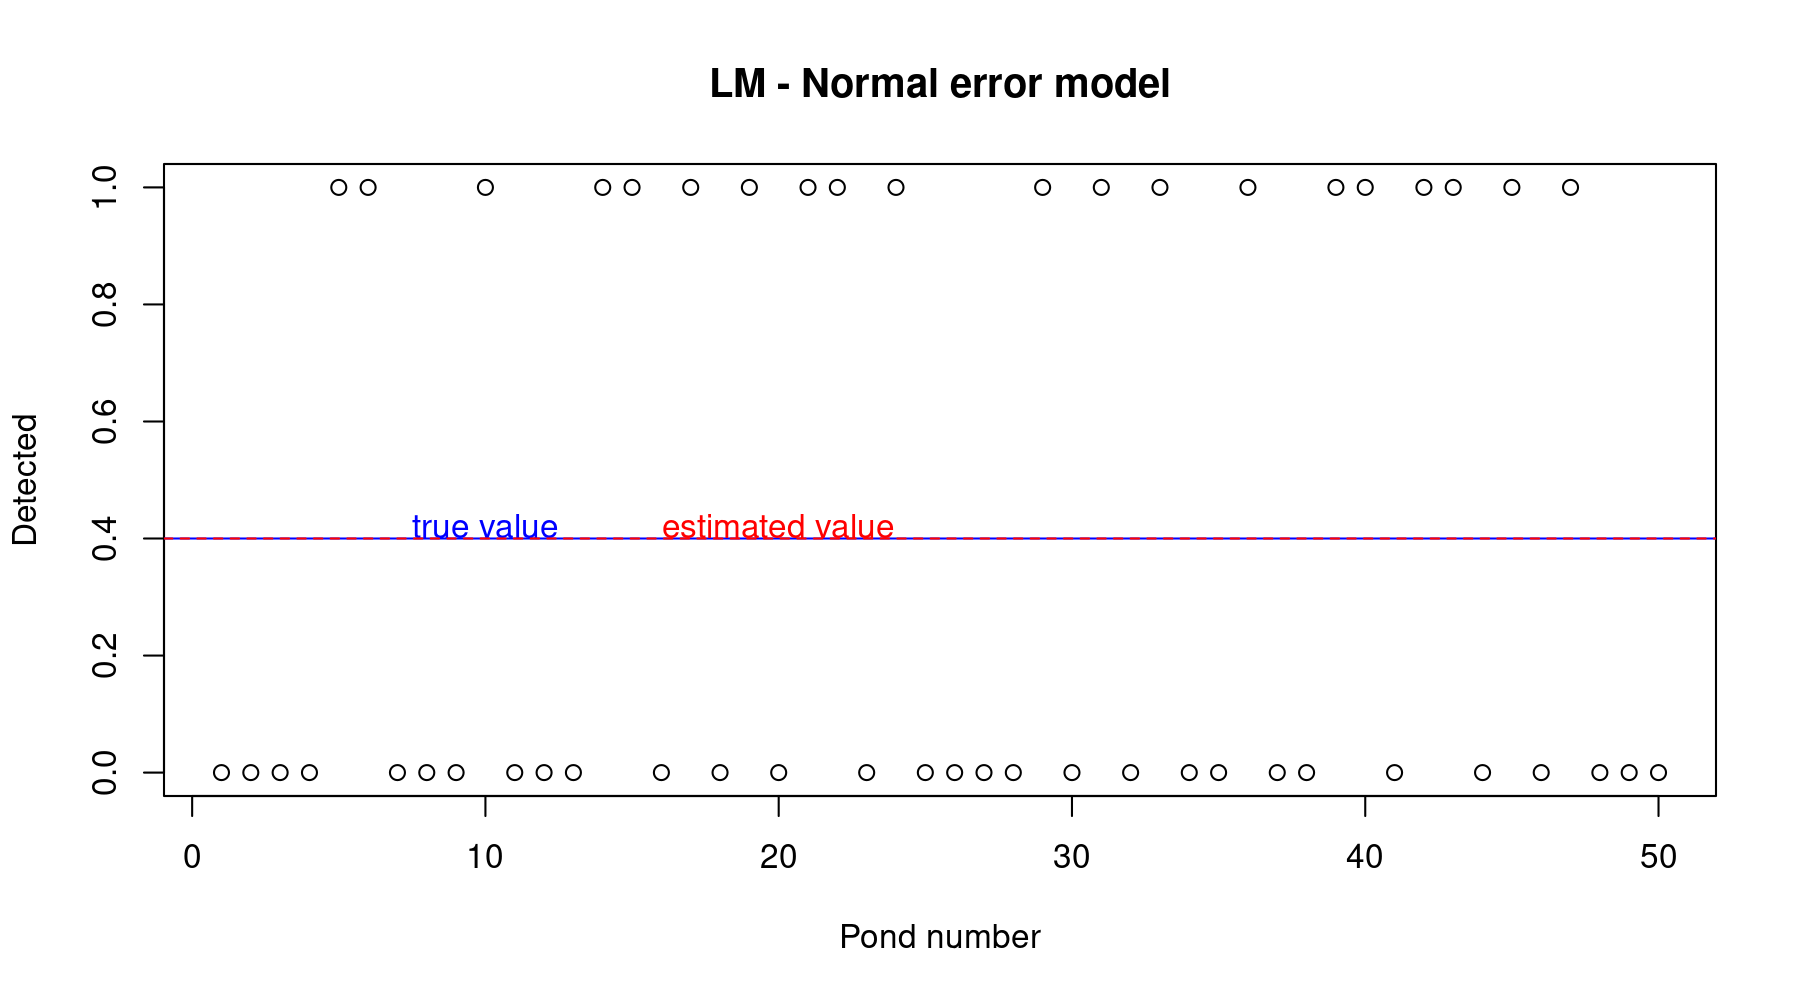

In [30]:
plot(y, xlab = "Pond number", ylab = "Detected", main = "LM - Normal error model")
abline(h = 20/50, col = "blue", lty= 1)
text(x = 10, y = 20/50 + 0.02, labels = "true value", col = "blue")
abline(h = tadpole_lm$coefficients, col = "red", lty= 2)
text(x = 20, y = tadpole_lm$coefficients + 0.02, labels = "estimated value", col = "red")

> **QUESTION**
>
> (13) - Run this linear model with 1000 fold more pond (n=50*1000)
>
> (14) - What can you say about the estimated value compared to the true one?

In [31]:
# REPLY (13) and (14) HERE

<details>
  <summary>ANSWER</summary>
 
  **copy/paste**

  ```R
    # 1. DATA
    n_big = 50 * 1000
    y_big = rbinom(n_big,1,20/50)
    # 2. MODEL
    tadpole_lm_big <- lm(y ~ 1)
    # 3. PLOT
    plot(y_big, xlab = "Pond number", ylab = "Detected")
    abline(h = 20/50, col = "blue", lty= 1)
    text(x = 10*1000, y = 0.45, labels = "true value", col = "blue")
    abline(h = tadpole_lm_big$coefficients, col = "red", lty= 2)
    text(x = 10*1000, y = 0.35, labels = "estimated value", col = "red") 
  ```

</details>

#### The Generalized Linear Model (GLM)

1. The Data is express through a Binomial model.
$$
y \sim Binomial(n, \theta)
$$

2. The link function given by logit:

The logit link function is used to model the probability of success ($\theta$) as a function of one or more explanatory variables. The logit function transforms the linear combination of explanatory variables into the probability space $(0,1)$.

The logit function is defined as:
$$
\text{logit}(\theta) = \log \left( \frac{ \theta }{1- \theta} \right)
$$

3. The explanatory variable
This equation links the linear predictor (often denoted as $\eta$) to the probability of success ($\theta$) using the logit function.

The linear combination of explanatory variables can be written as follows:

$$
\text{logit}(\theta) = a + b x_1 + c x_2 + ...
$$


In our model, since we do not have explanatory variables, the model is simply:
$$
\text{logit}(\theta) = a
$$

In [32]:
tadpole_glm_logit <- glm(y ~ 1, family = binomial(link = "logit"))
tadpole_glm_logit


Call:  glm(formula = y ~ 1, family = binomial(link = "logit"))

Coefficients:
(Intercept)  
    -0.4055  

Degrees of Freedom: 49 Total (i.e. Null);  49 Residual
Null Deviance:	    67.3 
Residual Deviance: 67.3 	AIC: 69.3

Hint: since the logit function is: $\log\left( \frac{x}{1-x} \right)$, the reverse logit is:$\frac{exp(x)}{(1+exp(x))}$

In [33]:
theta_estimated_glm_logit = exp(tadpole_glm_logit$coefficient)/(1+exp(tadpole_glm_logit$coefficient))

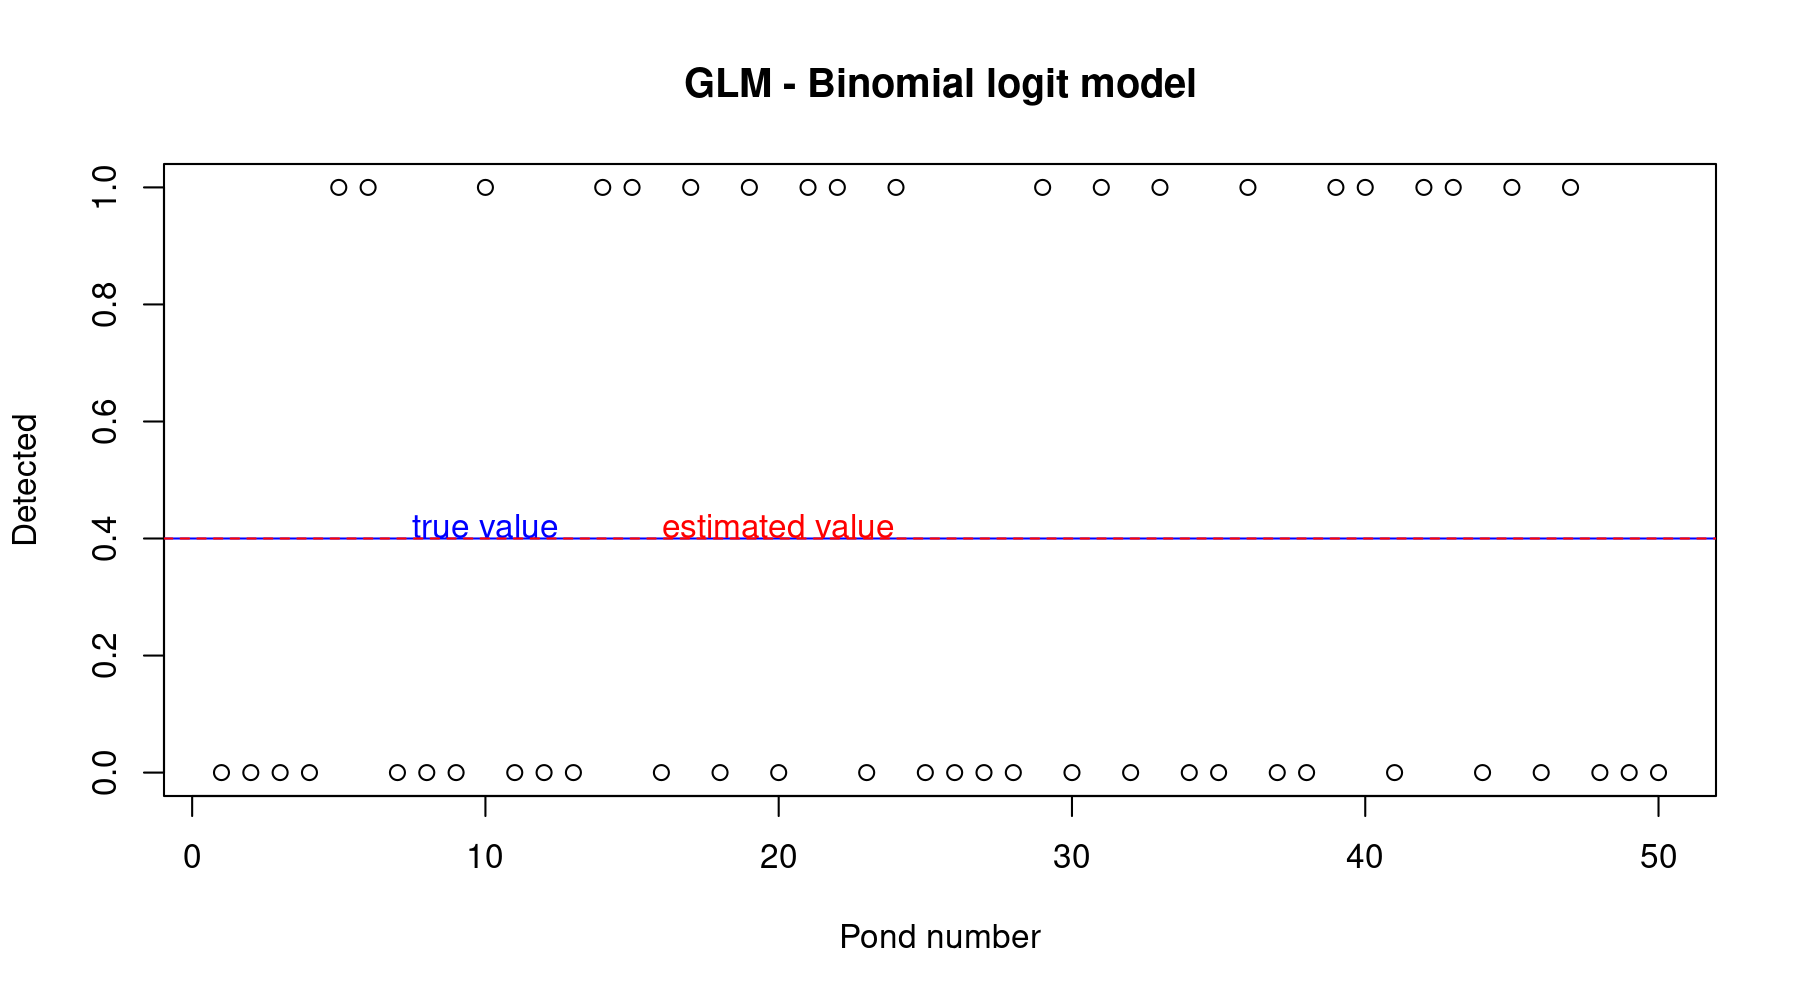

In [34]:
plot(y, xlab = "Pond number", ylab = "Detected", main = "GLM - Binomial logit model")
abline(h = 20/50, col = "blue", lty= 1)
text(x = 10, y = 20/50 + 0.02, labels = "true value", col = "blue")
abline(h = theta_estimated_glm_logit, col = "red", lty= 2)
text(x = 20, y = theta_estimated_glm_logit + 0.02, labels = "estimated value", col = "red")

### Mathematical solution

#### The Frequensist approach using Maximum Likelihood

The binomial distribution is given by:
$$
p(y \vert \theta) = \frac{n!}{y!(n-y)!} \theta^y (1-\theta)^{n-y}
$$

The binomial distribution is linked to the likelihood of the bernouilli trials. 

The likelihood of of process fowllowing a Binomial law is geven by:

$$
L( \theta \vert y) = \frac{n!}{y!(n-y)!} \theta^y (1-\theta)^{n-y}
$$

Note: the way the Likelihood is written is going to be confusing when introducing the Bayesian approach because $y$ and $\theta$ are not written in the same order.

In [35]:
#' Function of binomial likelihood
#'
#' n: Number of trial
#' y: Number of successes
#' p: Probability of success for each trial
binomial_likelihood = function(n,y,theta){
    return(choose(n, y) * theta^y * (1 - theta)^(n - y))
}

In [36]:
p_seq = c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
theta_seq = seq(0,1,length.out = 100)
Likelihood_n50_y20 = sapply(theta_seq, function(p) binomial_likelihood(n=50,y=20,theta=p))

<details>
  <summary>HINT</summary>
 
A quick way to create a vector with value of a for loop
    
```R
for(p in p_seq){
    print(binomial_likelihood(n=50,y=20,theta=p))
} 
```
you can use the `apply` familly function (here `sapply`): 
```R
sapply(p_seq, function(p) binomial_likelihood(n=50,y=20,theta=p)) 
```

</details>

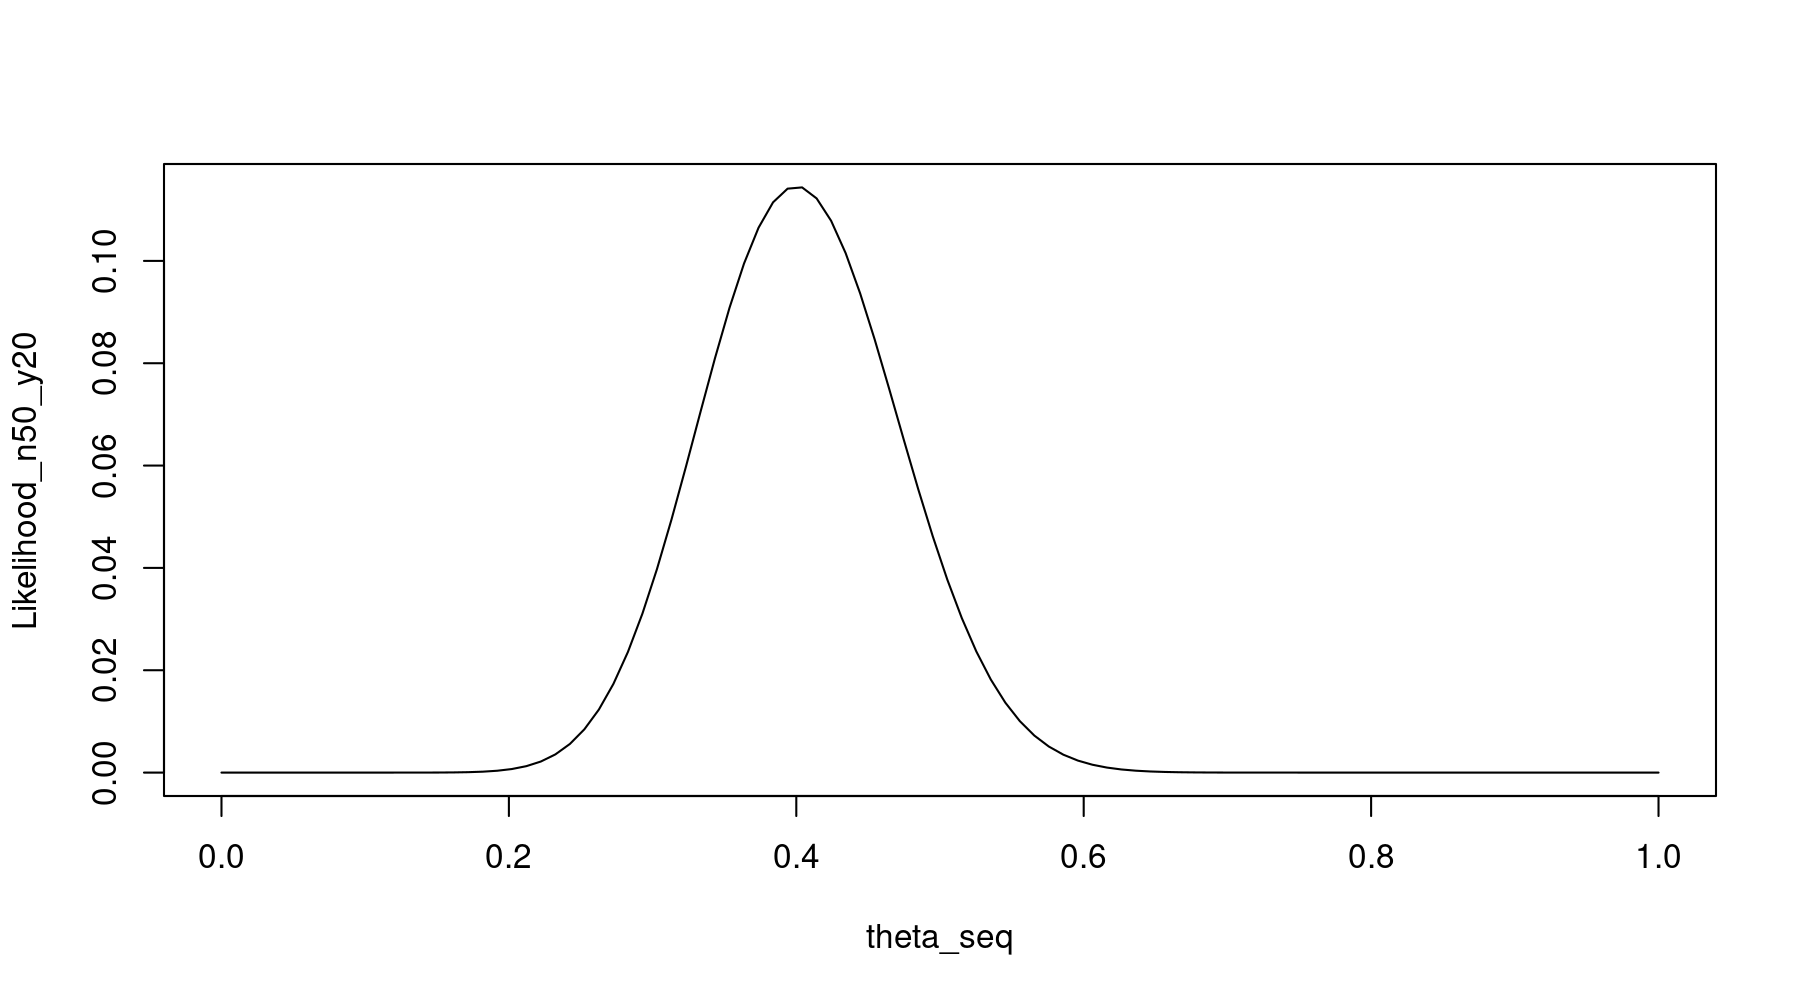

In [37]:
plot(theta_seq, Likelihood_n50_y20, type = "l")           

#### Maximum Likelihood Estimate

The maximum likelihood estimate (MLE) of $\theta$, denoted $\hat{p}$ is the maximum $p$ for this equation:

$$
L( \theta \vert y) = \frac{n!}{y!(n-y)!} \theta^y (1-\theta)^{n-y}
$$

And a quick demonstration give:

$$
\hat{\theta} = \frac{y}{n} = \frac{20}{50} = 0.4
$$

That we can check on the graphic:

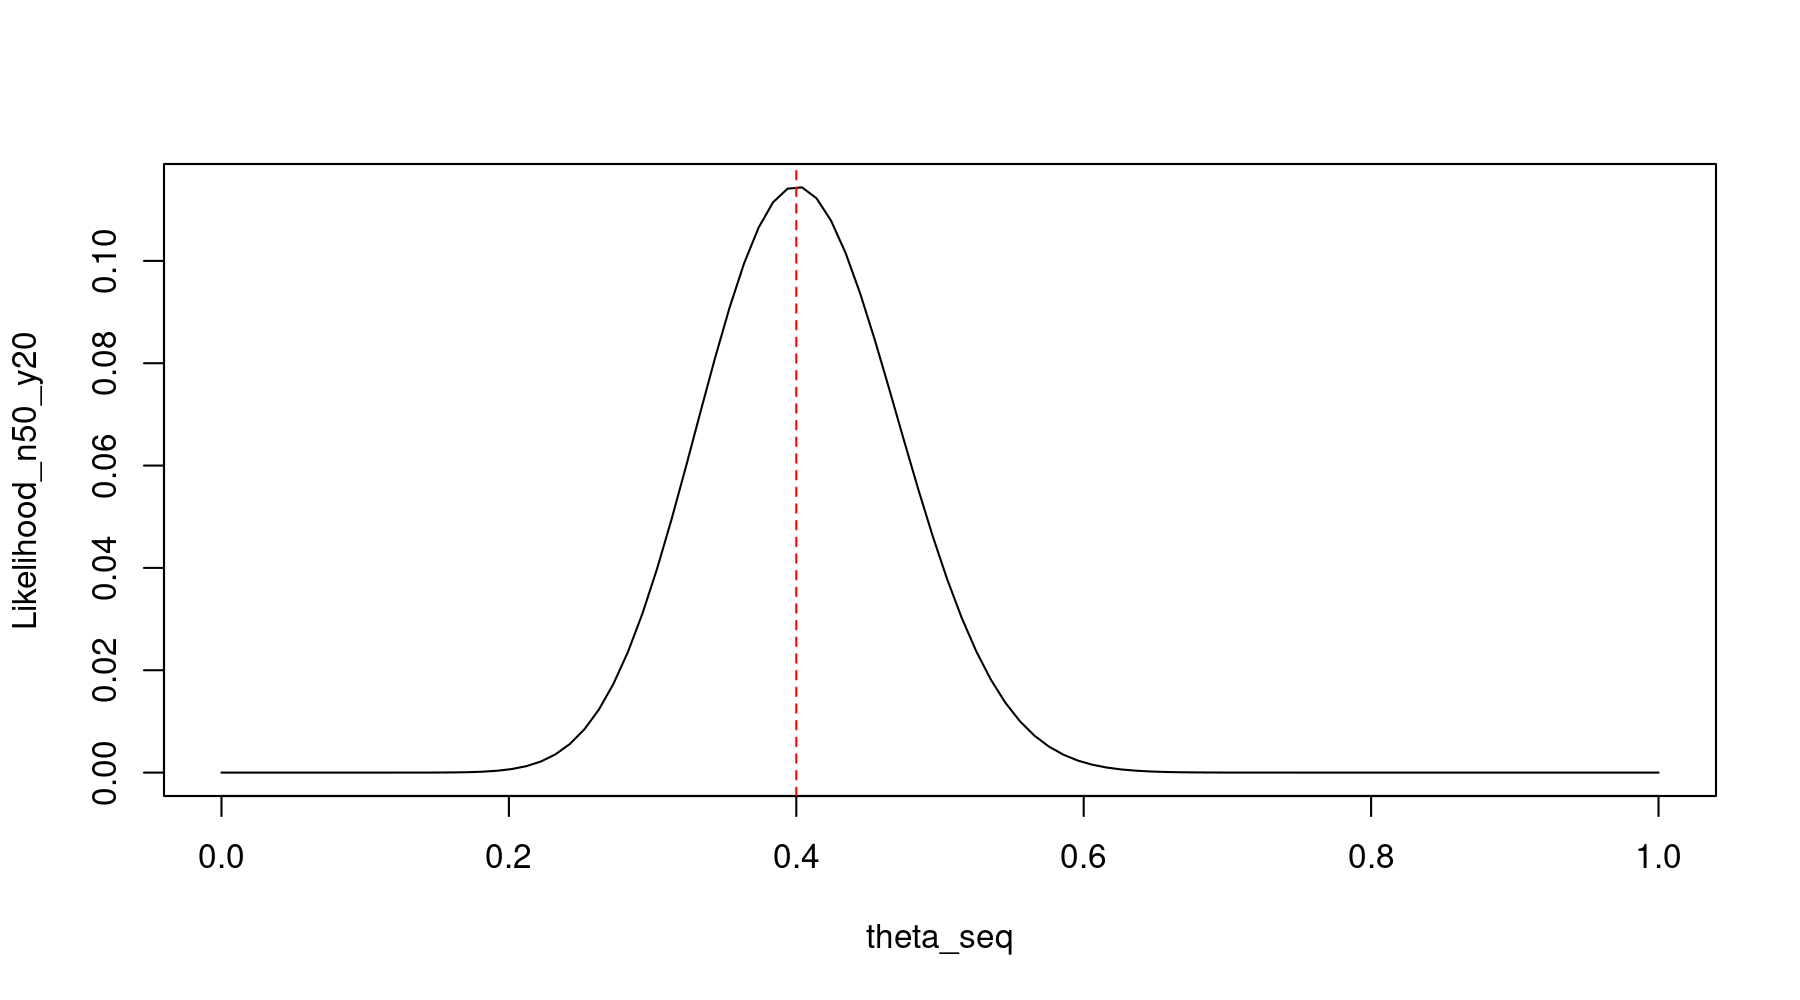

In [38]:
plot(theta_seq,Likelihood_n50_y20, type = "l")
theta_hat = 0.4
abline(v = theta_hat, col = "red", lty = 2)

#### Frequentist naming

In our example, the frequenist approach is super efficient. And very linked to the intuition. Before modelling, we expected the *probability of seeing a tadpole* of being the resuls of the frequence of tadpoles seen over the number of total tadpoles, $20/50$. And that is the reason of the name of "frequentist" approach.

### The Bayesian approach

In Bayesian inference, the bayes rule is written as: 

$$
p(\theta \vert D) = \frac{p(D \vert \theta) p(\theta)}{p(D)}
$$

* $D$: the data, what you observe
* $\theta$: the unknown parameters
* $p(\theta \vert D)$: the posterior distribution
* $p(D \vert \theta)$: the "likelihood" which is quite confusing since it's written as a probability function (sampling distribution fo the data).
* $p(D)$: the marginal probability of the data
* $p(\theta)$: the probability of the parameters, the prior distribution

Since parameter $\theta$ won't change the value of $p(D)$, it's a constant value with $\theta$ and therefore we have:

$$
p(\theta \vert D) \propto p(D \vert \theta) p(\theta)
$$

#### Application on tadpole example

* $y$: is the number of observed tadpole $y=20$ resulting from the experiment
* $\theta$: the parameter $\theta$ that we don't know
* $p(y \vert \theta) \propto \theta^y (1-\theta)^{n-y}$ already defined. The symbol $\propto$ mean proportional to (because the missing part does not depend on the unkwon $p$, we can remove it).

About the new elements:
* $p(y)$ is not required since its a scaling parameter which does not depend on the unkown $\theta$. We introduce the symbol $\propto$ meaning *proportional to*.

$$
p(D \vert \theta ) = p(y \vert \theta) \propto \theta^y (1-\theta)^{n-y}
$$

And therefore:

$$
p(\theta \vert y) \propto \theta^y (1-\theta)^{n-y} \times p(\theta)
$$

#### Prior distribution

* $p(\theta)$: the prior distribution, which is the more complex to define, and a complexity that is not in the frequentist approach (while in practice, we need to give a parameter space in the optimization algorithm).

We know that $\theta \in [0,1]$, and a common distribution is the Beta distribution (see [Beta wikipedia](https://en.wikipedia.org/wiki/Beta_distribution)) given by:
$$
p(\theta) \propto \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Absent of any prior knowledge, we set $p(\theta)$ to be uninformative with the shapes parameters $\alpha=1$ and $\beta=1$.

And finally:

$$
p(\theta \vert y) \propto \theta^y (1-\theta)^{n-y} \times \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

<details>
  <summary>HINT</summary>
 
In R, the Beta distribution is given with `...beta()`

Density:
```R
dbeta(x, shape1, shape2, ncp = 0, log = FALSE) 
```


Distribution function:
```R
pbeta(q, shape1, shape2, ncp = 0, lower.tail = TRUE, log.p = FALSE) 
```


Quantile function:
```R
qbeta(p, shape1, shape2, ncp = 0, lower.tail = TRUE, log.p = FALSE) 
```


Random generation:
```R
rbeta(n, shape1, shape2, ncp = 0) 
```

</details>

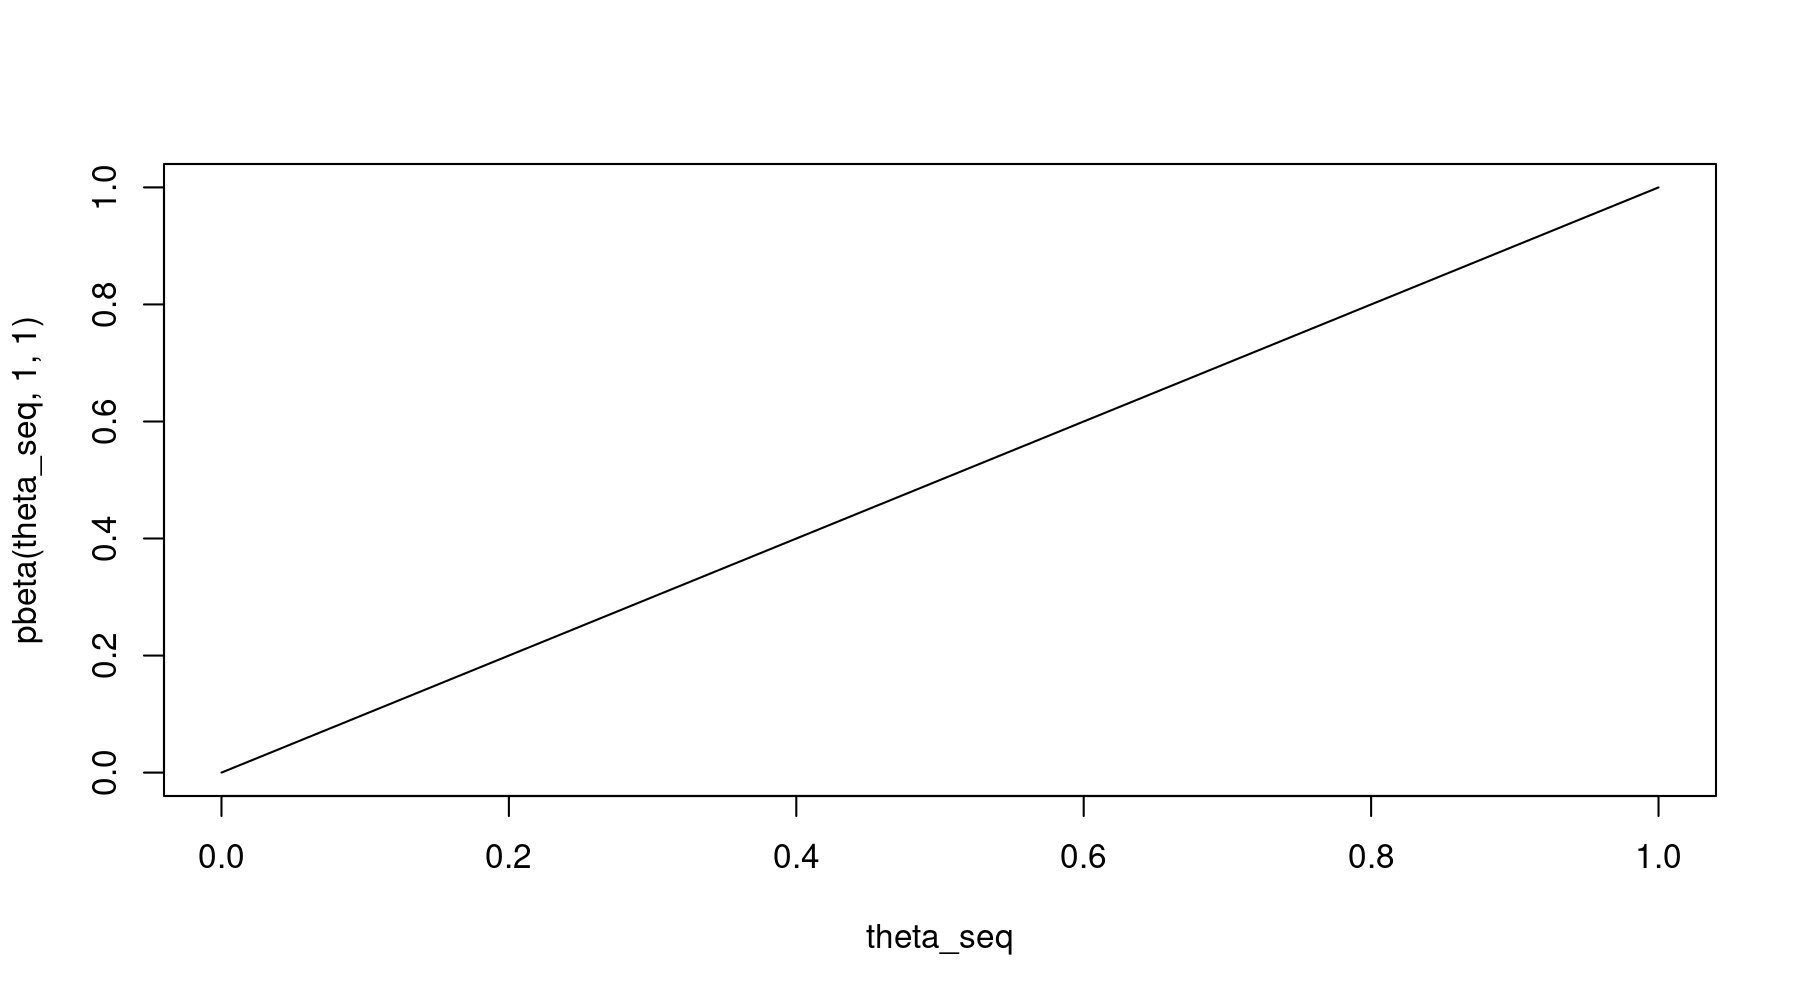

In [39]:
# Distribution of Beta(1,1)
plot(theta_seq, pbeta(theta_seq,1,1), type = "l")

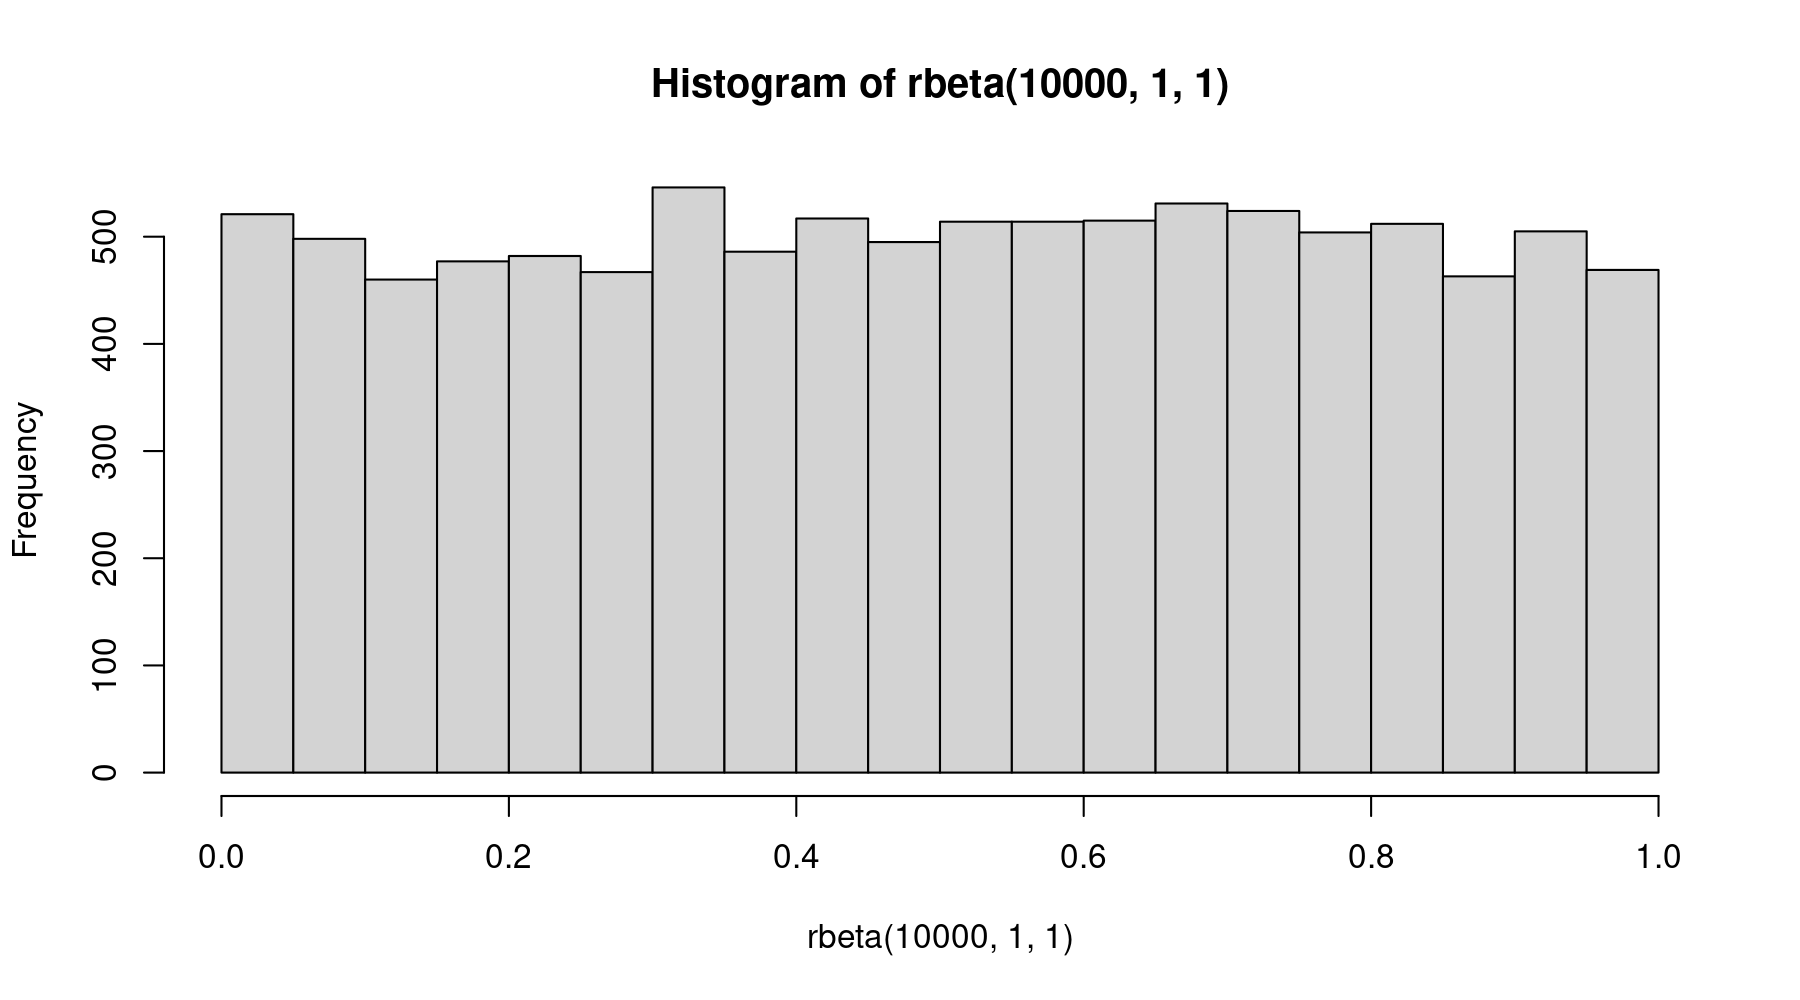

In [40]:
# Histogram of Beta(1,1)
hist(rbeta(1e4,1,1))

###### Posterior distribution

As a consequence, the posterior is given by:
$$
p(\theta \vert y) \propto  p(y \vert \theta) p(\theta)
$$

Which results in:
$$
p(\theta \vert y) \propto  \theta^y (1-\theta)^{n-y} \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

And therefore:
$$
p(\theta \vert y) \propto \theta^{y+\alpha-1} (1-\theta)^{n-y+\beta-1}
$$

The posterior distribution is also a Beta distribution with shapes $\alpha_{post}=y+\alpha$ and $\beta_{post}=n-y+\beta$, where the mean is given by:
$$
\mathbb{E}(\theta \vert y) = \frac{\alpha_{post} }{\alpha_{post} + \beta_{post}}= \frac{21}{52} \approx 0.404
$$


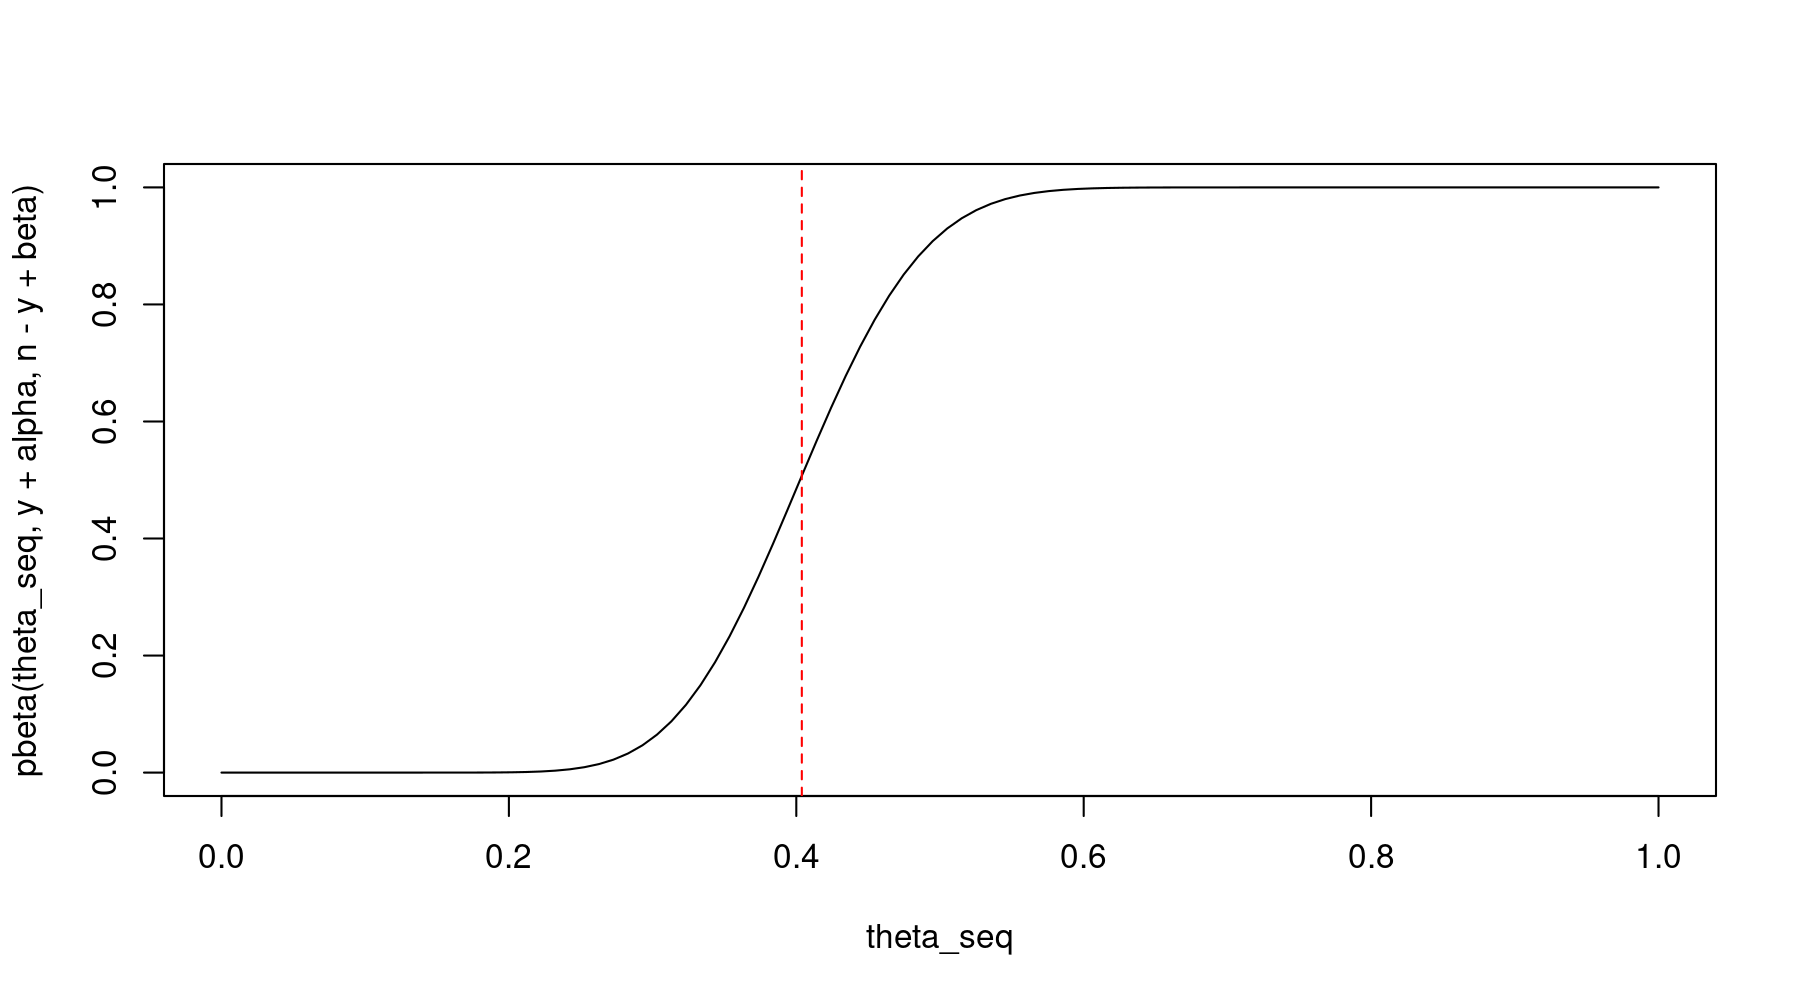

In [41]:
# Distribution of Beta(1,1)
n=50
y=20
alpha=1
beta=1
plot(theta_seq, pbeta(theta_seq,y+alpha, n-y+beta), type = "l")
abline(v=21/52, col = "red", lty = 2)

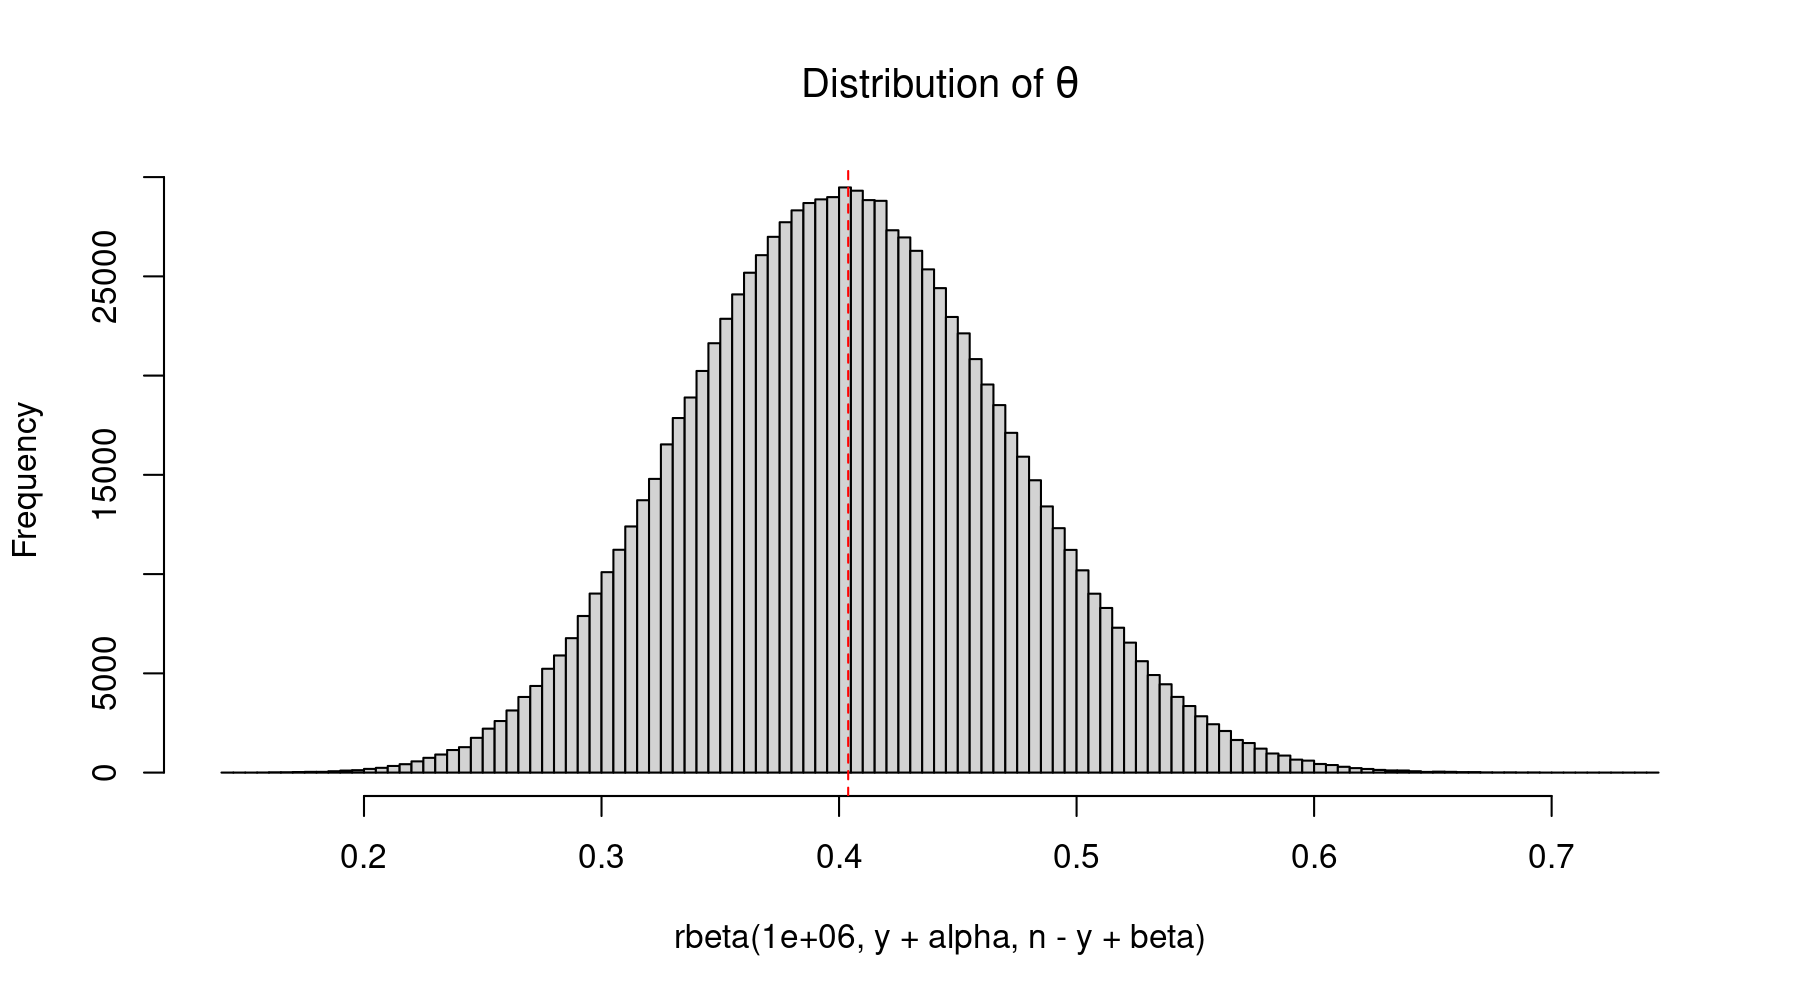

In [42]:
hist(rbeta(1e6,y+alpha, n-y+beta),
     breaks=100,
     main = expression(paste("Distribution of ", theta)),
    )
abline(v=21/52, col = "red", lty = 2)

#### Gain and Cost of Bayesian approach

The gain of the Bayesian approach is the distribution of the $\theta$. But the cost is the prior distribution we have to provide.

Using the beta distribution, we are going to change the value of $\alpha$ and $\beta$ used in the prior distribution.

> **QUESTION**
>
> (15) - Change the value of alpha and beta and Plot the new beta distribution.
> For instance alpha=beta=0.5, or alpha=beta=1.5
>
> (16) - Compute and plot the distribution of the new theta
>
> (17) - Compute the mean of theta given y
>
> (18) - How does it change the estimation of theta distribution?

In [43]:
# REPLY HERE



## An other example of the Bayesian approach: Bird or TV watching

The Bayesian approach come from the Bayesian rules:

$$
p(A \vert B) = \frac{p(B \vert A) p(A)}{p(B)} = \frac{p(B \cap A)}{p(B)}
$$

* $p(A \vert B)$: conditional probability of observing $A$ given that $B$ is known
* $p(B \vert A)$: conditional probability of observing $B$ given $A$
* $p(A)$: marginal probability of $A$
* $p(B)$: marginal probability of $B$
  
### Model setting

Assume you have 2 activities on sunday afternoon: going watching birds ($B$) or watching TV ($T$), and this depends on whether condition good ($g$) or bad ($b$).
* $p(g) = 0.6$: marginal probability of good weather
* $p(B) = 0.7$: marginal probability of watching bird
* $p(B \cap T) = 0.5$: joint probability watching bird and good weather

From this knwolede, we can rebuild this table:

|                   | Good weather ($g$) | Bad weather ($b$) |         |
|-------------------|--------------------|-------------------|---------|
| **Bird watching** | **0.5**            |  *0.2*            | **0.7** |
| **Watch TV**      | *0.1*              |  *0.2*            | *0.3*   |
|                   | **0.6**            |  *0.4*            | *1.0*   |

### Using Bayes rule

Now, what is the probability of a bad weather, knowing your are looking TV?

Intuition would hardly be possible. From the table, we can applied the Bayes rule and the answer is:

$$
p(b \vert T) = \frac{p(b \cap T)}{p(T)} = \frac{0.2}{0.3} \approx 0.66
$$